In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [33]:
def my_fft(data, sample_rate=10):
    fftSize = len(data)
    spectrum = np.fft.fft(data)
    freq = np.fft.fftfreq(fftSize, 1/sample_rate)
    return (freq, spectrum)

def my_ifft(spectrum, sample_rate=10):
   # freq = np.fft.fftfreq(fftSize, 1/sample_rate)
    return np.fft.ifft(spectrum)

def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

In [34]:
Nparts, Nturns =  1500, 20000
betPU, alfPU       =  1.3, -0.9
betK, alfK         =  0.8,  0.6
gamPU, gamK        =  (1 + alfPU**2)/betPU, (1 + alfK**2)/betK
muPUK, muKPU       =  1.51, 2*np.pi*1.34 - 1.51
total_angle        =  2*np.pi*1.34
etaPUK, etaKPU     =  -0.01, -0.01    #eta PUK must be reletevely small, so they dont change slices so fast... 0.02 breaks the system ... It is the limit case!!!! very sensitive on etaPUK --> 2 much unwanted mixing, also etaKPU cant go very low(limit case 0.3) because then the mixing is bad
sigdelt            =   5.74e-7          # rms momentum spread in unit
Th, Trev           =  .1e-6, 5.0e-6, # half width of simulation window and revolution period in s
Tovlap, NSamp, add = 4*sigdelt*abs(etaPUK + etaKPU)*Trev, 800, '2000'
gain               =  0.0001  #as long as I reduce the eta, i have to reduce gains as well... see book
gainL              =  8e-7

DTSamp   = Th/NSamp


len(frequency_evaluation 1001
diafora frequency_evaluation 6400000.0
lin result: 0.00015640625
DTSamp 1.2499999999999998e-10
time_evaluation_s last 4.6875e-09
time_evaluation_s0 -4.6875e-09
samples 9.898666666666665


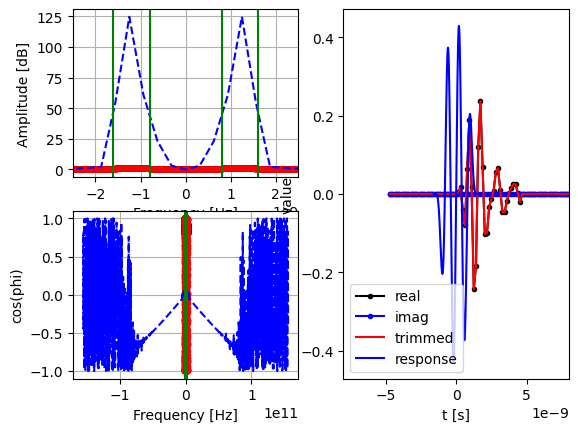

In [120]:
band_start_Hz = 0.8e9
band_end_Hz = 1.6e9

wlL, wrL = -1.6e-9, 1.6e-9
def respL( Dt ):
    #if Dt < 1.*wlL or Dt > 1.*wrL:
     #   print( f' ===> function respL called with Dt ={1e6*Dt:8.4f}' )
    return ((63e9*Dt)*(1 - 6.5e18*Dt**2)*(1 - 1.55e18*Dt**2)*(1 - (.625e9*Dt)**2)**8)/18

n_f_points = 1000


time_axis_response = np.linspace(wlL, wrL, n_f_points)

# Evaluate the response on this clean axis
response_signal_clean = respL(time_axis_response)

spectrum_response = np.fft.fftshift(np.fft.fft(response_signal_clean))
freqs_response = np.fft.fftshift(np.fft.fftfreq(len(response_signal_clean), d=(time_axis_response[1] - time_axis_response[0])))

frequency_evaluation_Hz = np.linspace(-2*band_end_Hz, 2*band_end_Hz, int(n_f_points)+1)
print('len(frequency_evaluation',len(frequency_evaluation_Hz))
print('diafora frequency_evaluation',frequency_evaluation_Hz[1]-frequency_evaluation_Hz[0])
print('lin result:', len(frequency_evaluation_Hz) / (frequency_evaluation_Hz[1] - frequency_evaluation_Hz[0]))
# reshaffle to be ifft-compatible
frequency_evaluation_Hz = np.concatenate([frequency_evaluation_Hz[int(n_f_points/2):], frequency_evaluation_Hz[0:int(n_f_points/2)]])
# compute equivalent time axis
time_evaluation_s = np.linspace(0, 1, len(frequency_evaluation_Hz))/(frequency_evaluation_Hz[1]-frequency_evaluation_Hz[0])

dt = 1 / (time_evaluation_s[1] - time_evaluation_s[0])


# Generate 30 points before 0
extra_time = np.linspace(-time_evaluation_s[30], 0, 30)

# Prepend them to the time axis
time_evaluation_s = np.concatenate((extra_time, time_evaluation_s))
response_signal = respL(time_evaluation_s)
print('DTSamp',DTSamp)
print('time_evaluation_s last',time_evaluation_s[60])
print('time_evaluation_s0',time_evaluation_s[0])
bin=time_evaluation_s[1]-time_evaluation_s[0]
samples=1.6e-9/bin
print('samples',samples)

(freq_signal,spectrum_signal)=my_fft(response_signal, 1/(time_evaluation_s[1]-time_evaluation_s[0]))

# create bandpass filter
b, a = signal.butter(5, (band_start_Hz, band_end_Hz), 'bandpass', analog=True)
# evaluate response in frequency domain
w, h = signal.freqs(b, a, worN=frequency_evaluation_Hz)
# go to time domain
time_evaluation_v = my_ifft(h)


# go back to the frequency domain, this time using the "real" part of the reconstructed time signal
time_evaluation_v_trimmed = np.copy(np.real(time_evaluation_v))
time_evaluation_v_trimmed[30:] = 0
time_evaluation_v_trimmed[0:30] = time_evaluation_v_trimmed[0:30] - np.mean(time_evaluation_v_trimmed[0:30])
time_evaluation_v_trimmed = np.concatenate((np.zeros(30), time_evaluation_v_trimmed))

(freq_new, spectrum_new) = my_fft(time_evaluation_v_trimmed, 1/(time_evaluation_s[1]-time_evaluation_s[0]))

#we did this for 30 points, i) i have to acually put the rest of the points(30, with the same time and number of points to 0 ii) I have to draw my response function and its fft on top of this)


plt.subplot(2,2,1)
#plt.plot(w, 20 * np.log10(abs(h)), 'k.')
plt.plot(w, np.abs(h), 'k.', label='Original')
plt.plot(freq_new, np.abs(spectrum_new), 'r.', label='Filtered')
#plt.plot(freq_signal, np.abs(spectrum_signal), 'b.', label='Signal')
plt.plot(freqs_response, np.abs(spectrum_response), 'b--', label='Response')  # Add this line
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(-band_start_Hz, color='green') # cutoff frequency
plt.axvline(-band_end_Hz, color='green') # cutoff frequency
plt.axvline(band_start_Hz, color='green') # cutoff frequency
plt.axvline(band_end_Hz, color='green') # cutoff frequency
#plt.xlim([band_start_Hz/10, band_end_Hz*10])
plt.xlim([-2.5e9, 2.5e9])

plt.subplot(2,2,3)
plt.plot(w, np.cos(np.angle(h)), 'k.', label='Original')
plt.plot(freq_new, np.cos(np.angle(spectrum_new)), 'r.', label='Filtered')
#plt.plot(freq_signal, np.cos(np.angle(spectrum_signal)), 'b.', label='Signal')
plt.plot(freqs_response, np.cos(np.angle(spectrum_response)), 'b--', label='Response')  # Add this line
plt.xlabel('Frequency [Hz]')
plt.ylabel('cos(phi)')
plt.grid(which='both', axis='both')
plt.axvline(-band_start_Hz, color='green') # cutoff frequency
plt.axvline(-band_end_Hz, color='green') # cutoff frequency
plt.axvline(band_start_Hz, color='green') # cutoff frequency
plt.axvline(band_end_Hz, color='green') # cutoff frequency
#plt.xlim([band_start_Hz/10, band_end_Hz*10])

plt.subplot(1,2,2)
plt.plot(time_evaluation_s, np.real(time_evaluation_v_trimmed), 'k.-', label='real')
plt.plot(time_evaluation_s, np.imag(time_evaluation_v_trimmed), 'b.-', label='imag')
plt.plot(time_evaluation_s, time_evaluation_v_trimmed, 'r-', label='trimmed')
plt.plot(time_axis_response, response_signal_clean, 'b-', label='response')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('value')
plt.xlim([-5*1.6e-9, 5*1.6e-9])
#plt.ylim([-0.05, 0.05])
#plt.xlim([band_start_Hz/10, band_end_Hz*10])

plt.show()

keb 1011
kev2 1001
kev3 10


(-3.2e-09, 5.2e-09)

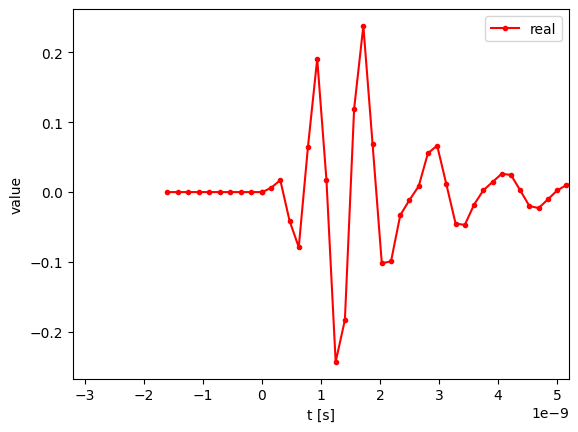

In [55]:
time_array = np.linspace(-1.6e-9, 0, int(samples))
zeros_array = np.zeros(int(samples))
result_time_array = np.concatenate([time_array, time_evaluation_s])  # Concatenate time arrays
result_v_array = np.concatenate([zeros_array, time_evaluation_v])  # Concatenate data arrays

print('keb',len(result_v_array))
print('kev2',len(time_evaluation_s))
print('kev3',len(time_array))

wlL, wrL = -1.6e-9, 1.6e-9

def respL( Dt ):
   # if Dt < 1.*wlL or Dt > 1.*wrL:
    #    print( f' ===> function respL called with Dt ={1e6*Dt:8.4f}' )
    return  (63e9*Dt)*(1 - 6.5e18*Dt**2)*(1 - 1.55e18*Dt**2)*(1 - (.625e9*Dt)**2)**8



plt.plot(result_time_array, np.real(result_v_array), 'r.-', label='real')
#plt.plot(result_time_array, np.imag(result_v_array), 'b.-', label='imag')
#plt.plot(result_time_array,respL(result_time_array), 'g.-', label='respL')

plt.legend()
plt.xlabel('t [s]')
plt.ylabel('value')
plt.xlim([-3.2e-9,5.2e-9])
#plt.ylim(0,1)

Text(0, 0.5, 'value')

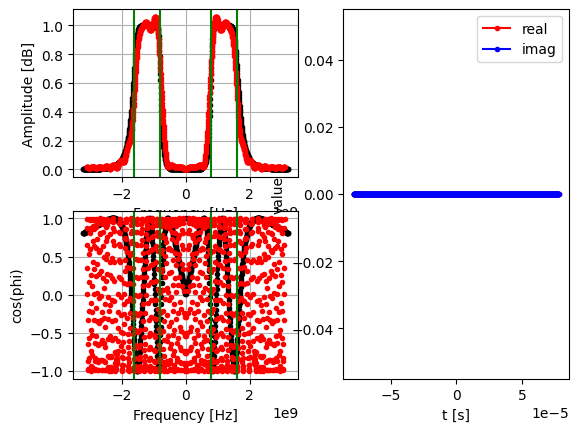

In [121]:
dt = 1 / (frequency_evaluation_Hz[1] - frequency_evaluation_Hz[0])
N = len(frequency_evaluation_Hz)
time_evaluation_s = np.linspace(-N/2, N/2 - 1, N) * dt
mask = (time_evaluation_s > 0) & (time_evaluation_s <= 1.6e-9)
time_evaluation_v_filtered = np.copy(time_evaluation_v)
time_evaluation_v_filtered[~mask] = 0

plt.subplot(2,2,1)
#plt.plot(w, 20 * np.log10(abs(h)), 'k.')
plt.plot(w, np.abs(h), 'k.', label='Original')
plt.plot(freq_new, np.abs(spectrum_new), 'r.', label='Filtered')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(-band_start_Hz, color='green') # cutoff frequency
plt.axvline(-band_end_Hz, color='green') # cutoff frequency
plt.axvline(band_start_Hz, color='green') # cutoff frequency
plt.axvline(band_end_Hz, color='green') # cutoff frequency
#plt.xlim([band_start_Hz/10, band_end_Hz*10])

plt.subplot(2,2,3)
plt.plot(w, np.cos(np.angle(h)), 'k.', label='Original')
plt.plot(freq_new, np.cos(np.angle(spectrum_new)), 'r.', label='Filtered')
plt.xlabel('Frequency [Hz]')
plt.ylabel('cos(phi)')
plt.grid(which='both', axis='both')
plt.axvline(-band_start_Hz, color='green') # cutoff frequency
plt.axvline(-band_end_Hz, color='green') # cutoff frequency
plt.axvline(band_start_Hz, color='green') # cutoff frequency
plt.axvline(band_end_Hz, color='green') # cutoff frequency
#plt.xlim([band_start_Hz/10, band_end_Hz*10])

plt.subplot(1,2,2)
plt.plot(time_evaluation_s, np.real(time_evaluation_v_filtered), 'r.-', label='real')
plt.plot(time_evaluation_s, np.imag(time_evaluation_v_filtered), 'b.-', label='imag')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('value')
#plt.xlim([0, 1.6e-9])
#plt.xlim([band_start_Hz/10, band_end_Hz*10])
